#### Mt. SAC CISB 62 Final Project Fall 2023

#### Student Name: Aron Joo

This project will work with the CIFAR10 small images classification dataset(https://keras.io/api/datasets/cifar10/)
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories; and I will perform Deep Learning techniques on it. There are over 10 classes in the dataset and I will use ANN and CNN to do a classification problem, identifying which classes the images would belong to; also including Autoencoders and Callbacks. I will visualize loss, accuracy, predict results, and show a confusion matrix.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

#import warnings and ignore them
import warnings
warnings.filterwarnings('ignore')

import keras
from sklearn.model_selection import GridSearchCV
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPool2D
from keras import backend as K  
from keras import datasets, layers, models
from keras import regularizers

from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import os

from keras_tuner.tuners import RandomSearch
from keras.layers import Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools


#from keras.utils import np_utils
from keras.utils import to_categorical
import datetime


Using TensorFlow backend


In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


#### We need a SSL connection to download the dataset

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


### CIFAR10 Dataset

In [4]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
from tensorflow.keras.datasets import cifar10 
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#Loads the CIFAR10 dataset
data = tf.keras.datasets.cifar10.load_data()


#### Let's see the shape

In [5]:
# Checking the number of rows (records) and columns (features)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


#### Visualize several images

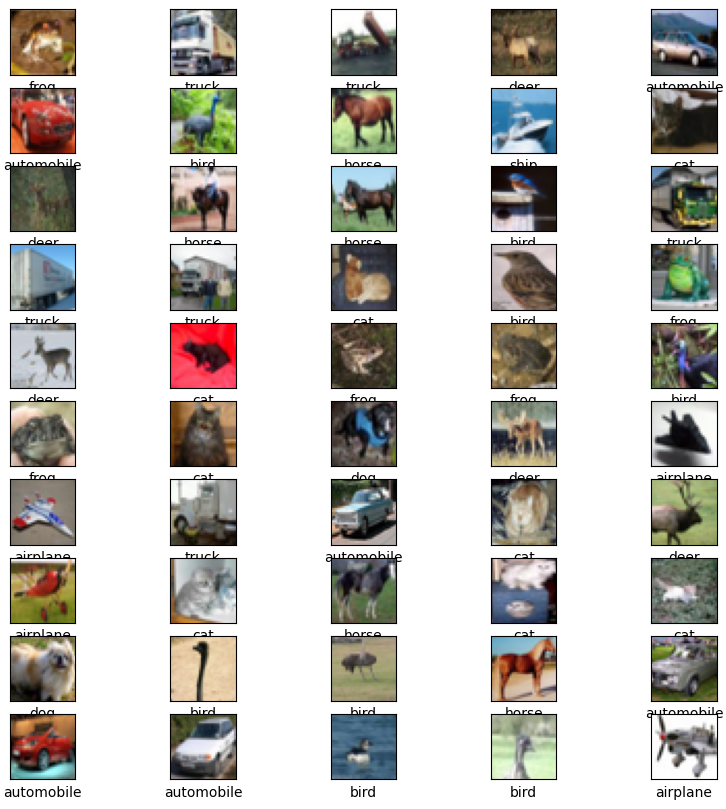

In [6]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


#### Select a sample image


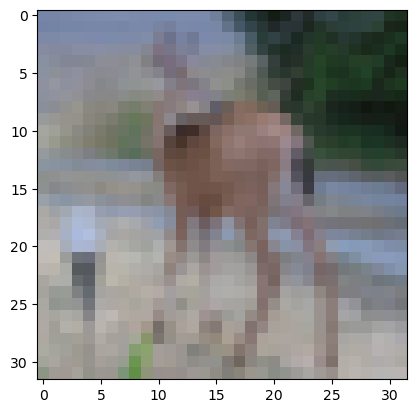

In [7]:
sample = plt.imshow(x_test[100])


#### Plot an image


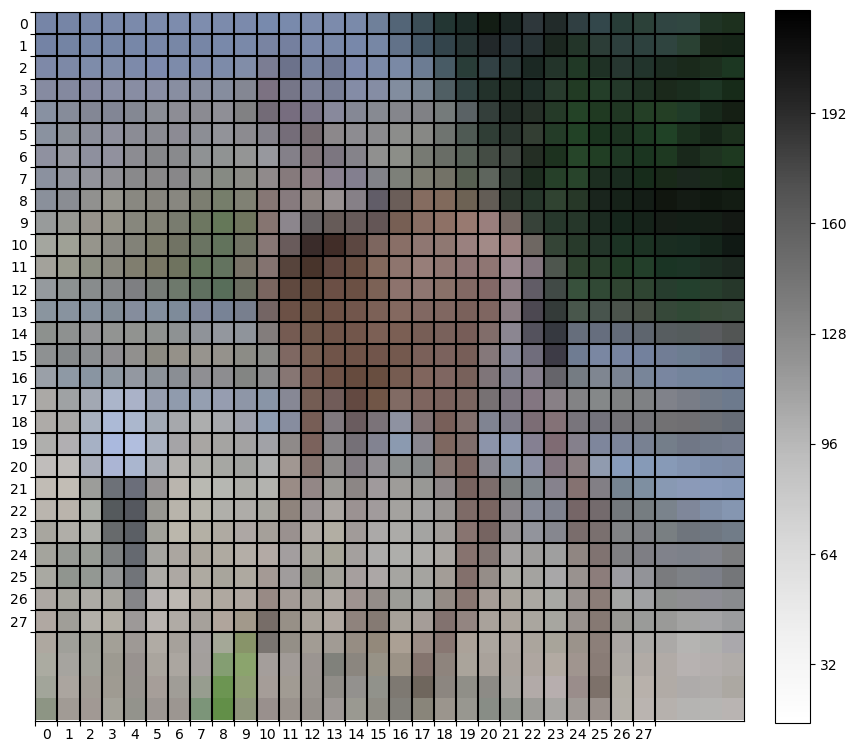

In [8]:
plt.figure(figsize = (10,10))
img = x_test[100]
plt.imshow(img,cmap="Greys")
ax = plt.gca()

# First turn off the  major labels, but not the major ticks
plt.tick_params(
    axis='both',        # changes apply to the both x and y axes
    which='major',      # Change the major ticks only
    bottom=True,        # ticks along the bottom edge are on
    left=True,          # ticks along the top edge are on
    labelbottom=False,  # labels along the bottom edge are off
    labelleft=False)    # labels along the left edge are off

# Next turn off the minor ticks, but not the minor labels
plt.tick_params(
    axis='both',        # changes apply to both x and y axes
    which='minor',      # Change the minor ticks only
    bottom=False,       # ticks along the bottom edge are off
    left=False,         # ticks along the left edge are off
    labelbottom=True,   # labels along the bottom edge are on
    labelleft=True)     # labels along the left edge are on

# Set the major ticks, starting at 1 (the -0.5 tick gets hidden off the canvas)
ax.set_xticks(np.arange(-.5, 28, 1))
ax.set_yticks(np.arange(-.5, 28, 1))

# Set the minor ticks and labels
ax.set_xticks(np.arange(0, 28, 1), minor=True);
ax.set_xticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);
ax.set_yticks(np.arange(0, 28, 1), minor=True);
ax.set_yticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);

ax.grid(color='black', linestyle='-', linewidth=1.5)
_ = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0,32,64,96,128,160,192,224,255])


#### Check the number of unique classes 

In [9]:
print(np.unique(y_train))
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#### Data Preprocessing

In [10]:
# Converting the pixels data to float type(one hot encoding) since it needs to be float by default
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
x_train = x_train / 255
x_test = x_test / 255 

# One hot encoding the target class (labels)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


### Building an Artifical Neural Network 

In [28]:
#instantiate the model
model = Sequential()

#Input layer
#input shape is the size of the picture
model.add(Dense(32, activation='relu',input_shape=(32,32,3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(10, activation='softmax'))


#### Checking the model summary

In [29]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32, 32, 32)        │        128 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_10 (Dense)                │ (None, 128)               │  4,194,432 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_11 (Dense)                │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,195,850 (16.01 MB)

 Trainable params: 4,195,850 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

#### Compiling the Model

In [42]:
model.compile(loss='mean_squared_error', optimizer = SGD(learning_rate=0.01), metrics=["accuracy"])
                                                                                       

#### Training the Model

In [43]:
model.fit(x_train,y_train, batch_size = 24, epochs = 10, verbose = 1, validation_data = (x_test, y_test))
                                                                                         

Epoch 1/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.3360 - loss: 0.0796 - val_accuracy: 0.3831 - val_loss: 0.0768
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.3397 - loss: 0.0793 - val_accuracy: 0.3888 - val_loss: 0.0763
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.3463 - loss: 0.0788 - val_accuracy: 0.3882 - val_loss: 0.0759
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.3538 - loss: 0.0782 - val_accuracy: 0.3935 - val_loss: 0.0755
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.3565 - loss: 0.0779 - val_accuracy: 0.3995 - val_loss: 0.0752
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.3583 - loss: 0.0778 - val_accuracy: 0.4039 - val_loss: 0.0750
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.3594 - loss: 0.0775 - val_accuracy: 0.4066 - val_loss: 0.0746
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.3653 -

#### Visualizing the Evaluation

Text(0.5, 1.0, 'Model Loss')

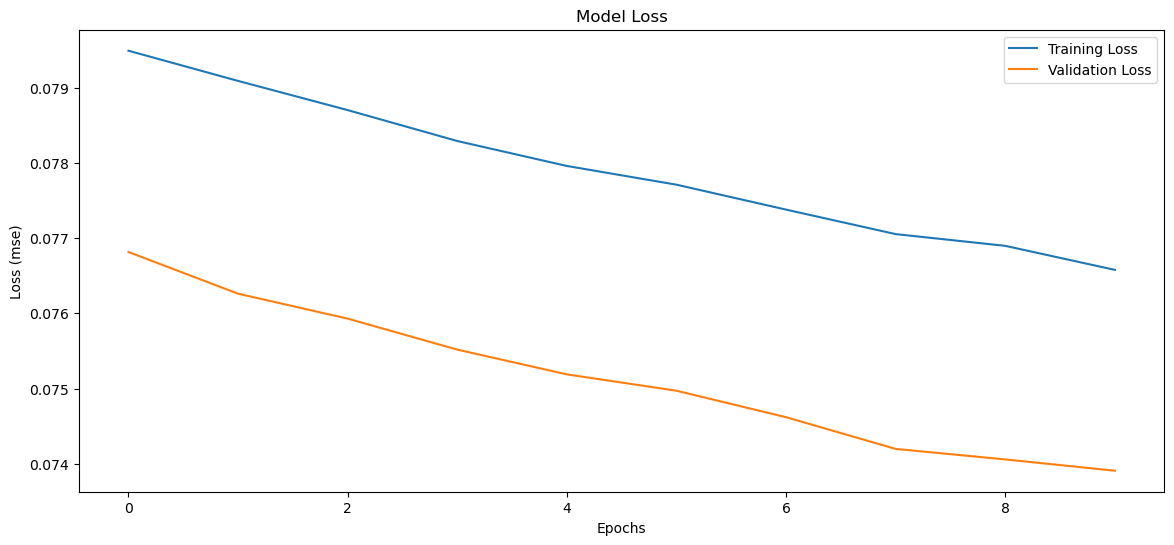

In [44]:
# Loss curve
plt.figure(figsize=[14,6])
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss (mse)', fontsize=10)
plt.title('Model Loss', fontsize=12)


#### Print the accuracy curve

Text(0.5, 1.0, 'Accuracy Curves')

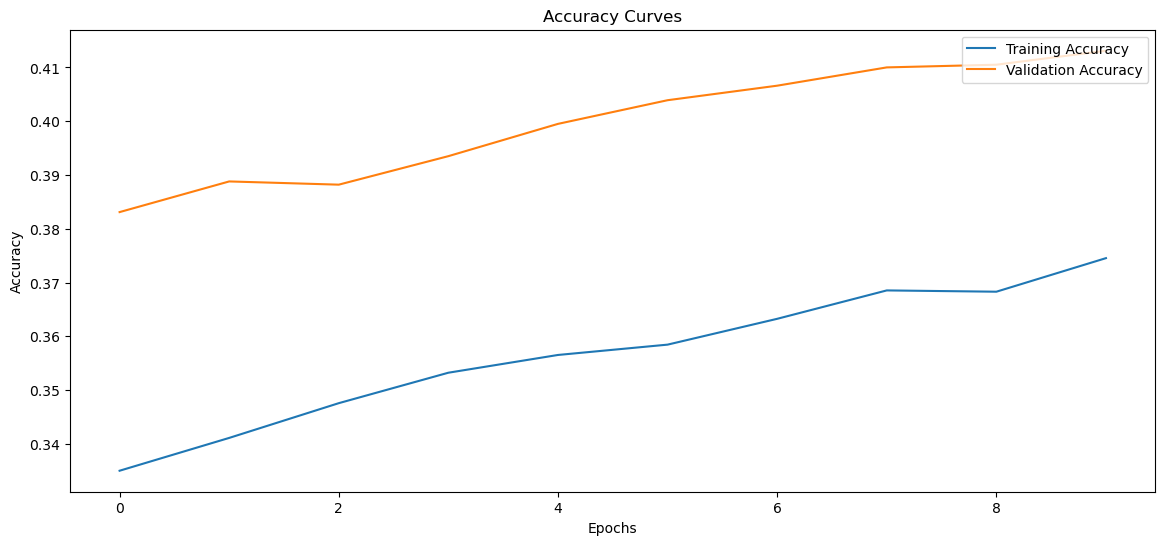

In [45]:
# Accuracy curve
plt.figure(figsize=[14,6])
plt.plot(model.history.history['accuracy'][:])
plt.plot(model.history.history['val_accuracy'][:])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)


### Evaluate the model (loss and accuracy)

In [46]:
loss, accuracy = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4146 - loss: 0.0740


#### Predicting the Result

In [47]:
ann_pred = model.predict(x_test)

for i in range (0,4):
    print('Prediction: ', ann_pred[i], ', True Value: ', y_test[i],'\n')
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Prediction:  [0.06886001 0.13458908 0.15922417 0.1447224  0.05178712 0.11817531
 0.12686908 0.03974294 0.13791695 0.018113  ] , True Value:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 

Prediction:  [0.052559   0.13600035 0.01421972 0.01354499 0.00865658 0.01342451
 0.00382358 0.00954428 0.43377104 0.31445593] , True Value:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 

Prediction:  [0.08982065 0.08628862 0.02008183 0.01947923 0.01088229 0.01627685
 0.00265761 0.01529372 0.6230344  0.11618485] , True Value:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 

Prediction:  [0.20878445 0.07465614 0.06967728 0.03101655 0.03268605 0.02636711
 0.00785579 0.04158892 0.4624307  0.04493703] , True Value:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 



### Confusion Matrix method

In [48]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observation')
    plt.xlabel('Prediction')
    

### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


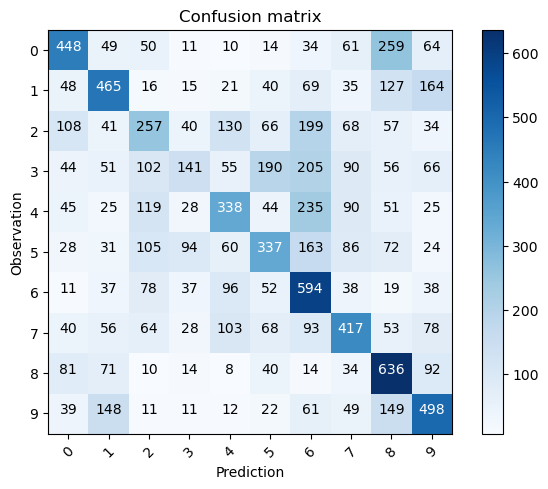

In [49]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


The performance with the ANN setup was not that good and the training values did not close together with the validation values, perhaps the Dense output layer of 10 may have caused it since having it as Dense(5) would not have the input and output shape match. 

### Building a Convolutional Neural Network

In [50]:
# Creating a sequential model and adding layers to it

model = Sequential()

# first Convolutional layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())

# second layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

# third layer
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# fourth
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

# fifth
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# sixth
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())

# Adding a dense layer (fully connected)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


#### Checking the model summary

In [51]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)        │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 32, 32, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)        │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)         │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)         │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)         │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)         │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_12 (Dense)                │ (None, 128)               │    262,272 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_6           │ (None, 128)               │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼──────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

#### Compiling the Model

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


#### Training the Model

In [53]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 72ms/step - accuracy: 0.1354 - loss: 2.7023 - val_accuracy: 0.1572 - val_loss: 2.3937
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.1878 - loss: 2.0048 - val_accuracy: 0.2116 - val_loss: 1.9755
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.2179 - loss: 1.8903 - val_accuracy: 0.1165 - val_loss: 3.1587
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.2316 - loss: 1.8617 - val_accuracy: 0.2742 - val_loss: 1.8615
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.2827 - loss: 1.7759 - val_accuracy: 0.3253 - val_loss: 1.7578
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.3396 - loss: 1.6710 - val_accuracy: 0.3772 - val_loss: 1.6313
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.3864 - loss: 1.5903 - val_accuracy: 0.4532 - val_loss: 1.4669
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.4403 - loss: 1.4986 - 

#### Visualizing the Evaluation

Text(0.5, 1.0, 'Model Loss')

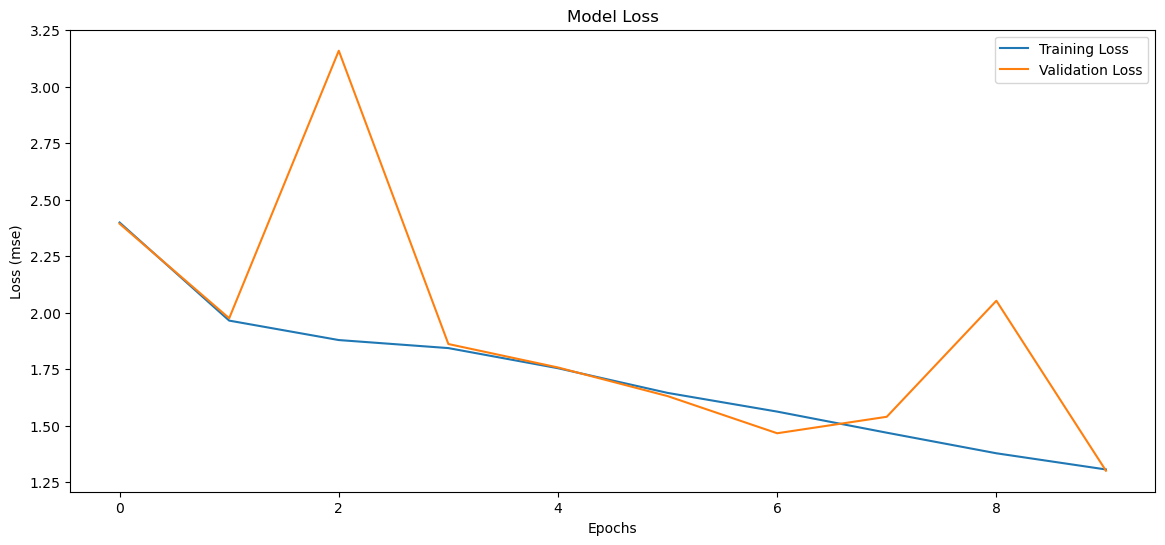

In [54]:
# Loss curve
plt.figure(figsize=[14,6])
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss (mse)', fontsize=10)
plt.title('Model Loss', fontsize=12)


#### Print the accuracy curve

Text(0.5, 1.0, 'Accuracy Curves')

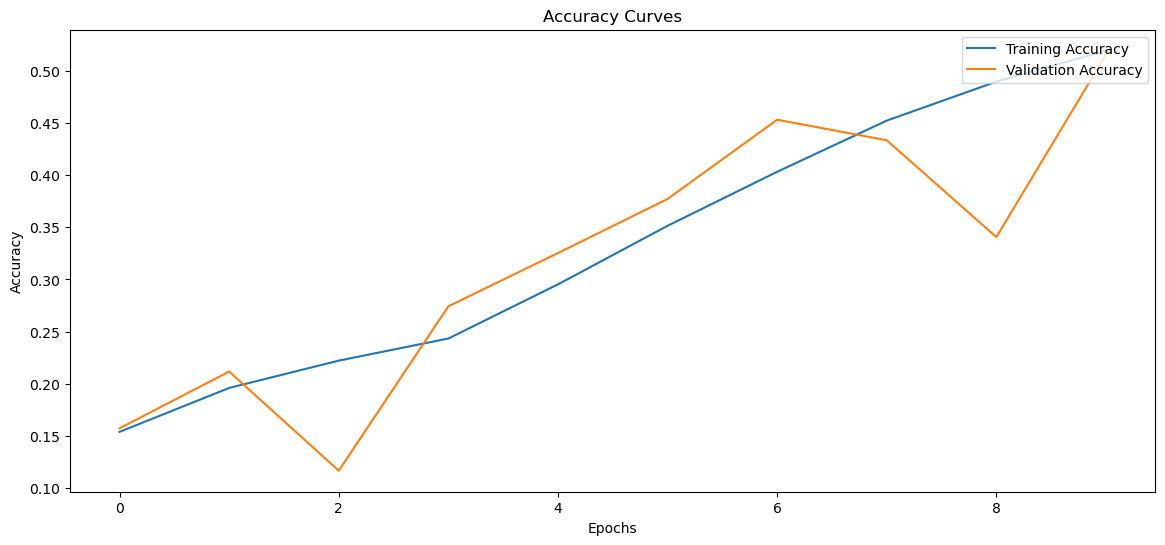

In [55]:
# Accuracy curve
plt.figure(figsize=[14,6])
plt.plot(model.history.history['accuracy'][:])
plt.plot(model.history.history['val_accuracy'][:])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)


### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


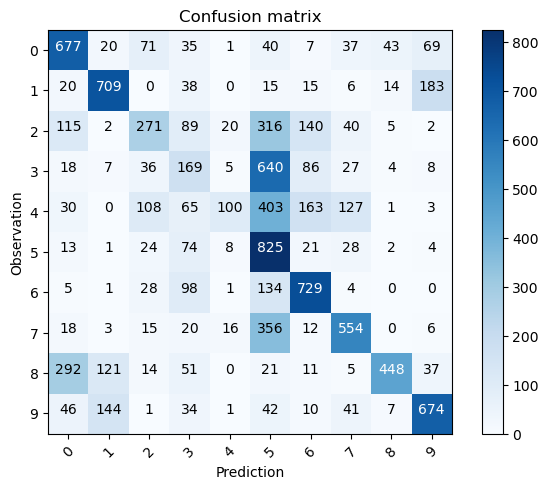

In [56]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


### Evaluate the model (loss and accuracy)

In [57]:
loss, accuracy = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5200 - loss: 1.2961


#### Predicting the Result

In [59]:
cnn_pred = model.predict(x_test)

for a in range (0,4):
    print('Prediction: ', cnn_pred[a], ', True Value: ', y_test[a],'\n')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Prediction:  [8.8334683e-04 2.1416827e-03 4.0144667e-02 4.6539325e-01 1.1366159e-02
 3.1470045e-01 1.5400699e-01 8.4531931e-03 2.7320106e-03 1.7826603e-04] , True Value:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 

Prediction:  [9.2534728e-02 5.7321811e-01 8.8992994e-05 1.8238598e-04 2.1341419e-05
 3.7594455e-05 3.3226355e-05 5.0709390e-05 2.0162687e-01 1.3220611e-01] , True Value:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 

Prediction:  [0.41341028 0.07407089 0.0270114  0.02582543 0.00548034 0.00924816
 0.00500329 0.00475228 0.40847197 0.02672593] , True Value:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 

Prediction:  [0.2752658  0.03146438 0.00906318 0.00623077 0.00100768 0.00183096
 0.00116898 0.0007958  0.6626245  0.01054795] , True Value:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 



The ANN model evaluation gave an accuracy: 0.4146 - loss: 0.0740 and this CNN model evaluation gave an accuracy: 0.5200 - loss: 1.2961. The CNN model at this run gave two unusual blips and high loss. The CNN made better predictions but with strange deviations.

In [61]:
from sklearn.metrics import mean_absolute_error 


In [62]:
#display the prediction of first 5 values, then calculate mae, lastly print first 5 predictions
# Let's check how much we are off on average 
# Enter three lines of code here:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
y_pred[0:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[8.8334683e-04, 2.1416827e-03, 4.0144667e-02, 4.6539325e-01,
        1.1366159e-02, 3.1470045e-01, 1.5400699e-01, 8.4531931e-03,
        2.7320106e-03, 1.7826603e-04],
       [9.2534728e-02, 5.7321811e-01, 8.8992994e-05, 1.8238598e-04,
        2.1341419e-05, 3.7594455e-05, 3.3226355e-05, 5.0709390e-05,
        2.0162687e-01, 1.3220611e-01],
       [4.1341028e-01, 7.4070893e-02, 2.7011404e-02, 2.5825430e-02,
        5.4803356e-03, 9.2481636e-03, 5.0032856e-03, 4.7522779e-03,
        4.0847197e-01, 2.6725929e-02],
       [2.7526581e-01, 3.1464383e-02, 9.0631796e-03, 6.2307701e-03,
        1.0076819e-03, 1.8309557e-03, 1.1689810e-03, 7.9580053e-04,
        6.6262448e-01, 1.0547945e-02],
       [3.0498095e-06, 2.4023178e-05, 6.6131097e-03, 1.0175447e-02,
        3.3787915e-03, 1.0595967e-03, 9.7867513e-01, 3.9966173e-05,
        3.0390596e-05, 3.7673030e-07]], dtype=float32)

In [63]:
#print mae value
mae


0.12028663861337677

In [64]:
#print the real value of record 20
y_pred[20]


array([0.01913765, 0.00974556, 0.04416441, 0.22251832, 0.06125508,
       0.3061573 , 0.03167886, 0.28311357, 0.00225396, 0.01997528],
      dtype=float32)

#### Let's take 25 images from the testing data and see how many of it we predicted correctly.

#### Plotting the Actual vs. Predicted results

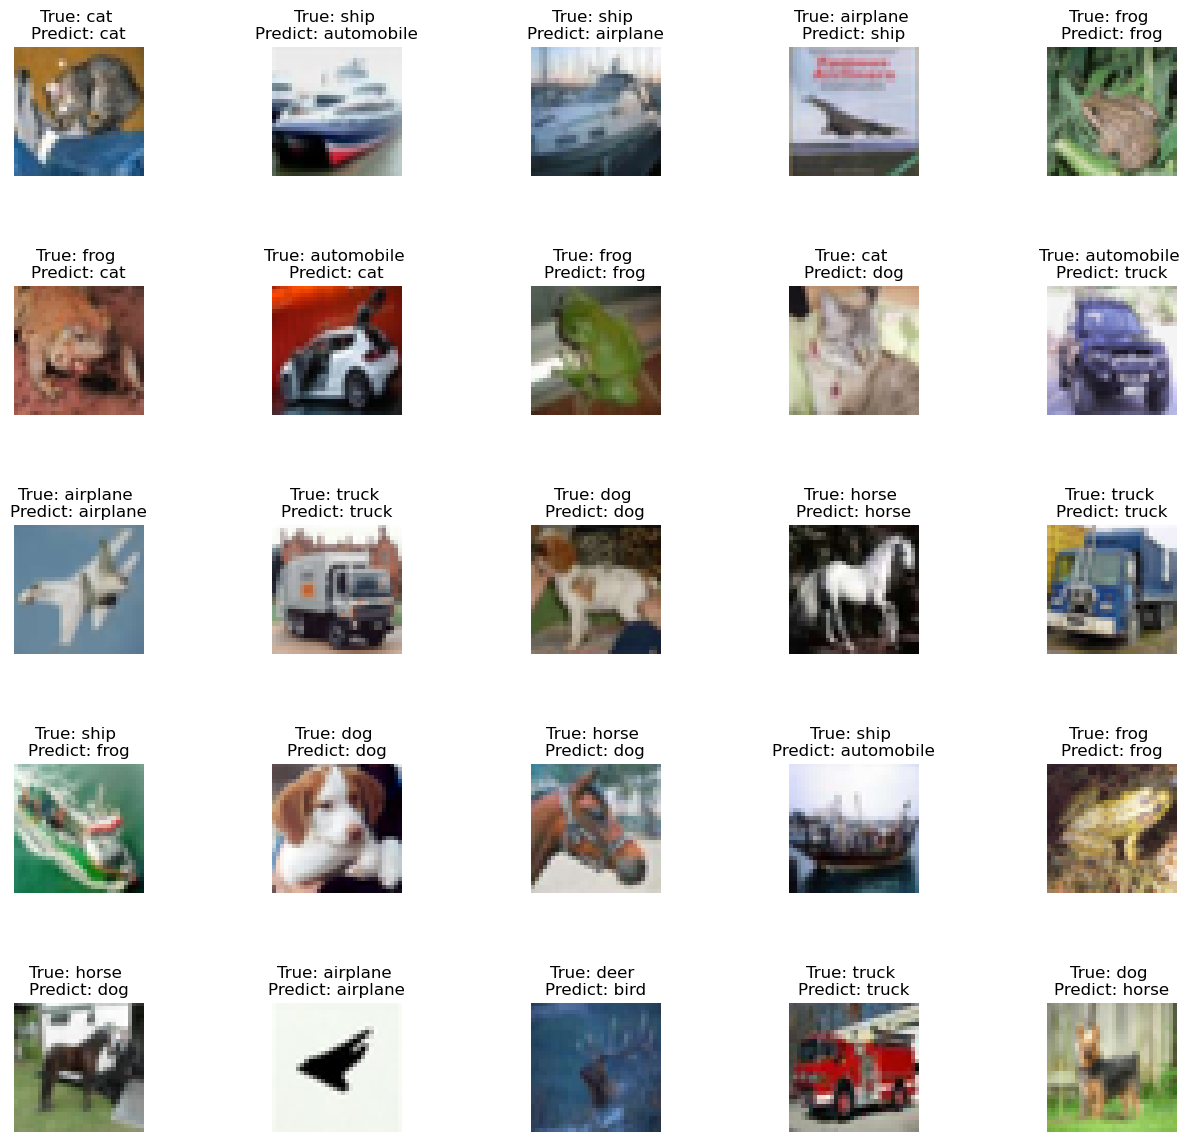

In [65]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
    

#### Predicting a few more examples

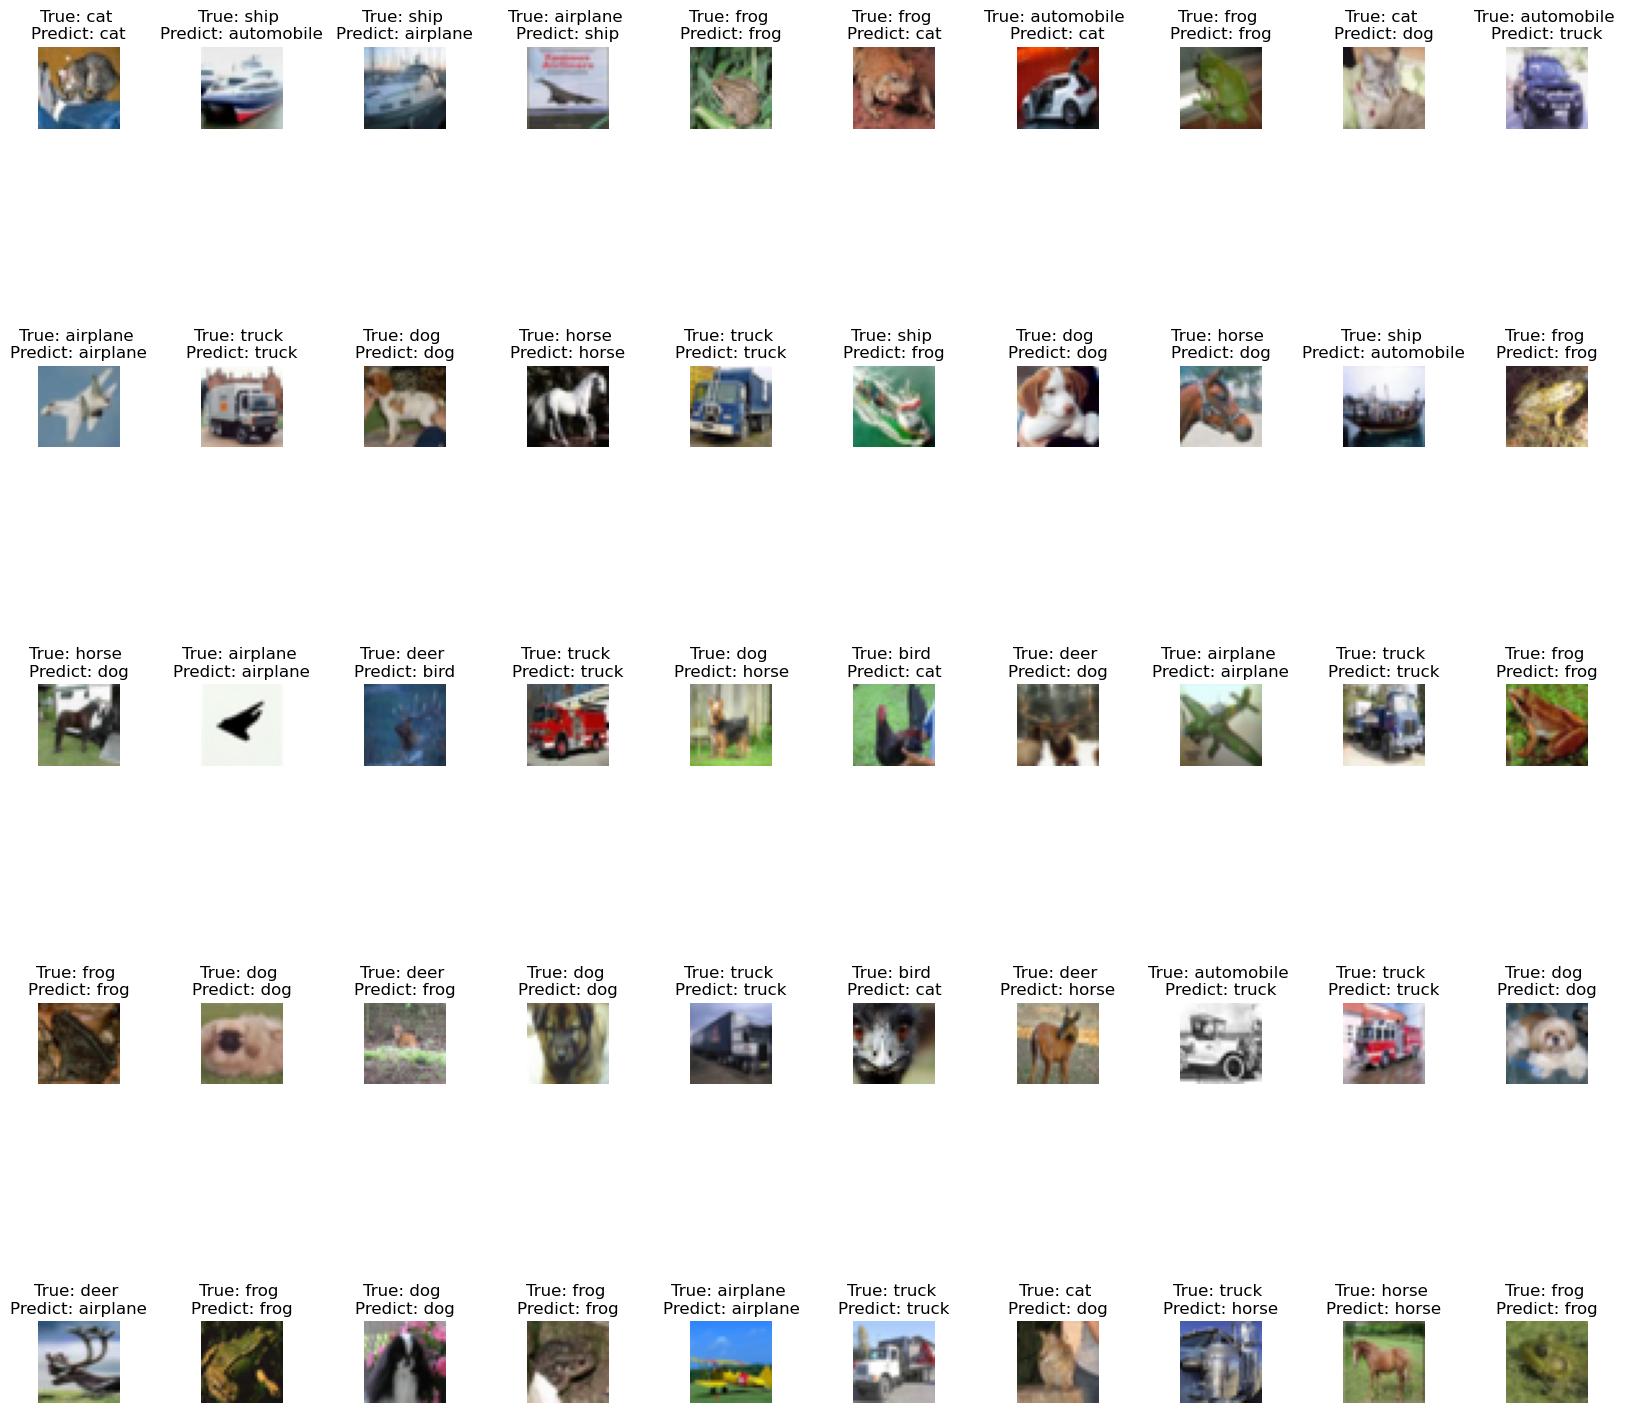

In [66]:
fig, axes = plt.subplots(5, 10, figsize=(20,20))
axes = axes.ravel()
for i in np.arange(0, 50):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
    

### Visualizing the model with Tensorflow

In [1]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='smp/model_plot1.png', show_shapes=True, show_layer_names=True)


NameError: name 'model' is not defined

### Autoencoders

In [79]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D


#### The random.seed is set to = 42 - to make this notebook's output stable across runs

In [80]:
np.random.seed(42)
tf.random.set_seed(42)


#### Function to plot images

In [81]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    

#### The denoising_encoder

In [82]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.GaussianNoise(0.1, input_shape=[32, 32, 3]),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
])


#### Checking the encoder summary

In [83]:
denoising_encoder.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 32, 32, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)        │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_15 (Dense)                │ (None, 512)               │  4,194,816 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,195,712 (16.01 MB)

 Trainable params: 4,195,712 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

#### The denoising_decoder

In [84]:
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(16 * 16 * 32, activation="relu", input_shape=[512]),
    keras.layers.Reshape([16, 16, 32]),
    keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2,
                                 padding="same", activation="sigmoid")])


#### Checking the decoder summary

In [85]:
denoising_decoder.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 8192)              │  4,202,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape (Reshape)               │ (None, 16, 16, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose                │ (None, 32, 32, 3)         │        867 │
│ (Conv2DTranspose)               │                           │            │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,203,363 (16.03 MB)

 Trainable params: 4,203,363 (16.03 MB)

 Non-trainable params: 0 (0.00 B)

#### Creating and training a Sequential model using the encoder and decoder

In [86]:
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
# compile the model
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(), metrics=["mse"])
# history of the model
history = denoising_ae.fit(x_train, x_train, epochs=3, validation_data=(x_test, x_test))


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 71ms/step - loss: 0.6035 - mse: 0.0230 - val_loss: 0.5937 - val_mse: 0.0169
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - loss: 0.5710 - mse: 0.0092 - val_loss: 0.5785 - val_mse: 0.0110
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - loss: 0.5668 - mse: 0.0076 - val_loss: 0.5745 - val_mse: 0.0095


### Printing the images - Original, Noisy, and Denoised

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


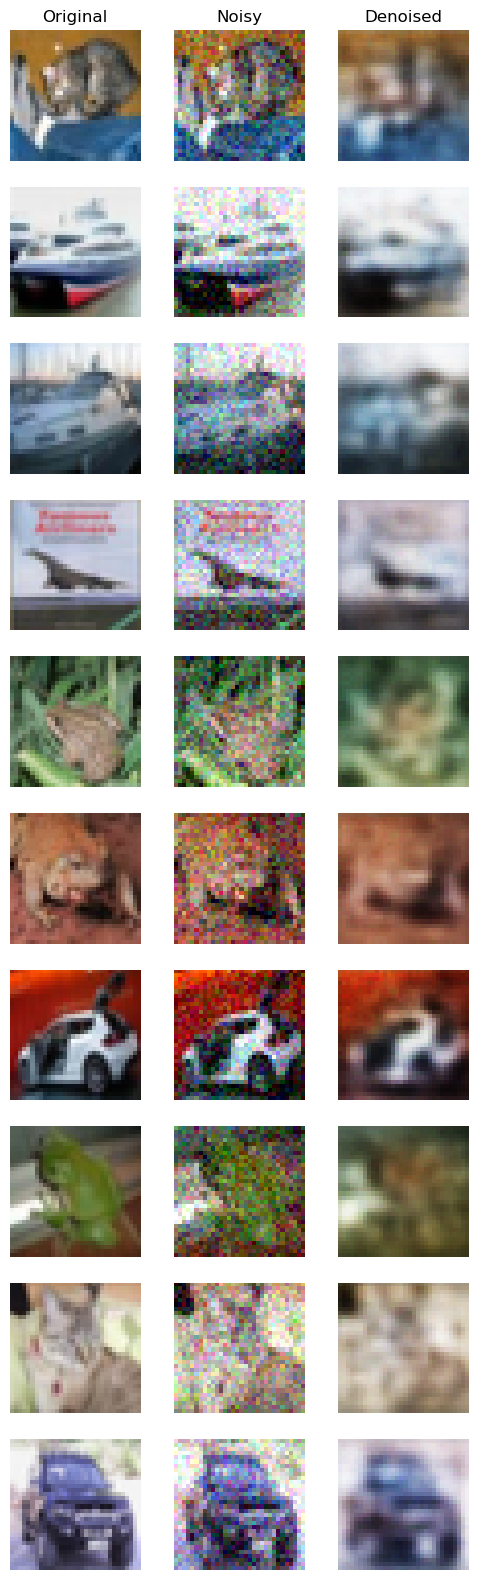

In [92]:
n_images = 10
new_images = x_test[:n_images]
new_images_noisy = new_images + np.random.randn(n_images, 32, 32, 3) * 0.1
new_images_denoised = denoising_ae.predict(new_images_noisy)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(new_images[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(np.clip(new_images_noisy[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")
plt.show()


## Conclusion

The model trained through the ANN model gave an accuracy: 0.4146 - loss: 0.0740 and the CNN model gave an accuracy: 0.5200 - loss: 1.2961. The loss seems to go down linearly with the ANN setup and the loss tracks high in the CNN setup. The CNN model at this run gave two unusual blips and high loss. The CNN made better predictions but with strange deviations. If "Accuracy" (measured against the training set) is very good and "Validation Accuracy" (measured against a validation set) is not as good, then the model is overfitting. So the model is not the model overfit more in the ANN and not much in the CNN, but the performance devaiations could be improved with tuning parameters. The predicted images are not perfect but accurate for the most part. The confusion matrix shows an okay prediction accuracy with the ANN and a better accuracy with the CNN with a value of 677 in the top left and 674 at the bottom right and spread out values across.
